### Prof. Pedram Jahangiry

You need to make a copy to your own Google drive if you want to edit the original notebook! Start by opening this notebook on Colab 👇

<a href="https://colab.research.google.com/github/PJalgotrader/Deep_forecasting-USU/blob/main/Lectures%20and%20codes/Module%208-%20Prophet%20and%20NeuralProphet/Module8_prophet_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



![logo](https://upload.wikimedia.org/wikipedia/commons/4/44/Huntsman-Wordmark-with-USU-Blue.gif#center)


## 🔗 Links

[![linkedin](https://img.shields.io/badge/LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/pedram-jahangiry-cfa-5778015a)

[![Youtube](https://img.shields.io/badge/youtube_channel-1DA1F2?style=for-the-badge&logo=youtube&logoColor=white&color=FF0000)](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ)

[![Twitter URL](https://img.shields.io/twitter/url/https/twitter.com/PedramJahangiry.svg?style=social&label=Follow%20%40PedramJahangiry)](https://twitter.com/PedramJahangiry)


---


# Module 8: Prophet and NeuralProphet 

In this module, we explore Prophet and its extension NeuralProphet — powerful forecasting tools designed to tackle real-world business time series challenges. Developed by Facebook, Prophet is known for its ease of use, interpretability, and flexibility in modeling complex components like holidays, multiple seasonalities, and growth constraints. 

Later, we expand the scope by introducing NeuralProphet, which builds on Prophet by adding autoregressive modeling and a neural network component to capture short-term dependencies and richer dynamics.

**Readings**: 
1. Prophet: Forecasting at Scale paper: https://peerj.com/preprints/3190.pdf 
2. Prophet documentation: https://facebook.github.io/prophet/docs/quick_start.html  
3. NeuralProphet: Explainable forecasting at Scale: https://arxiv.org/abs/2111.15397  
4. NeuralProphet documentation: https://neuralprophet.com/contents.html  


## Installation

Refer to the Prophet documentation for the most up-to-date installation guide: https://facebook.github.io/prophet/docs/quick_start.html


In [2]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

The input to Prophet is always a dataframe with two columns: **ds** and **y**. 

- The **ds** (datestamp) column should be of a format expected by Pandas, ideally **YYYY-MM-DD** for a date or **YYYY-MM-DD HH:MM:SS** for a timestamp. 
- The y column must be numeric, and represents the measurement we wish to forecast.

## Airline Passenger Dataset

In [4]:
# working with another timeseries data with time index 
df = pd.read_csv("https://raw.githubusercontent.com/PJalgotrader/Deep_forecasting-USU/main/data/airline_passengers.csv", index_col="Month")

df.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [5]:
df.index

Index(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
       '1949-07', '1949-08', '1949-09', '1949-10',
       ...
       '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
       '1960-09', '1960-10', '1960-11', '1960-12'],
      dtype='object', name='Month', length=144)

### Preparing time series data for Prophet


In [6]:
df.reset_index(inplace=True)
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])
df.head()


,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


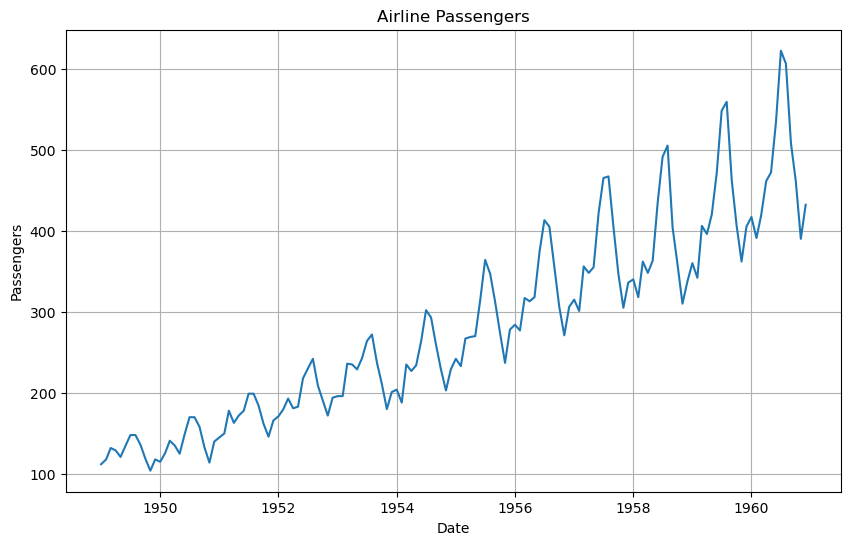

In [7]:
# plotting data
plt.figure(figsize=(10, 6))
plt.plot(df['ds'], df['y'])  # Plot the data

# Set title and labels
plt.title('Airline Passengers')
plt.ylabel('Passengers')
plt.xlabel('Date')

plt.grid(True)  # Enable grid for better readability

plt.show()


### Model Fitting

In [8]:
# Fitting the model
m1 = Prophet()
m1.fit(df)

08:35:20 - cmdstanpy - INFO - Chain [1] start processing
08:35:20 - cmdstanpy - INFO - Chain [1] done processing


### Forecasting 

Note: By default, Prophet uses daily data. You need to adjust your data frequency if needed!

In [9]:
# Making future data 
future = m1.make_future_dataframe(periods=24, freq='MS')
future.tail()

,ds
163,1962-08-01
164,1962-09-01
165,1962-10-01
166,1962-11-01
167,1962-12-01


In [10]:
# printing len df and future
print("len df: ", len(df))
print("len future: ", len(future))

len df:  144
len future:  168


In [11]:
# In sample predictions and future Forecasting
forecast = m1.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
163,1962-08-01,613.421868,586.226233,642.971302
164,1962-09-01,565.403289,535.314029,595.875113
165,1962-10-01,529.740084,500.586462,558.862571
166,1962-11-01,496.847584,467.714445,524.558460
167,1962-12-01,526.414425,497.941866,554.085965


In [15]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.662426,56.357415,111.039165,106.662426,106.662426,-21.848204,-21.848204,-21.848204,-21.848204,-21.848204,-21.848204,0.0,0.0,0.0,84.814222
1,1949-02-01,108.835452,51.168174,107.366491,108.835452,108.835452,-30.607474,-30.607474,-30.607474,-30.607474,-30.607474,-30.607474,0.0,0.0,0.0,78.227979
2,1949-03-01,110.798186,80.826808,140.883867,110.798186,110.798186,-0.455896,-0.455896,-0.455896,-0.455896,-0.455896,-0.455896,0.0,0.0,0.0,110.342290
3,1949-04-01,112.971212,80.392821,138.285573,112.971212,112.971212,-5.160478,-5.160478,-5.160478,-5.160478,-5.160478,-5.160478,0.0,0.0,0.0,107.810735
4,1949-05-01,115.074141,81.984397,141.437862,115.074141,115.074141,-3.807947,-3.807947,-3.807947,-3.807947,-3.807947,-3.807947,0.0,0.0,0.0,111.266194


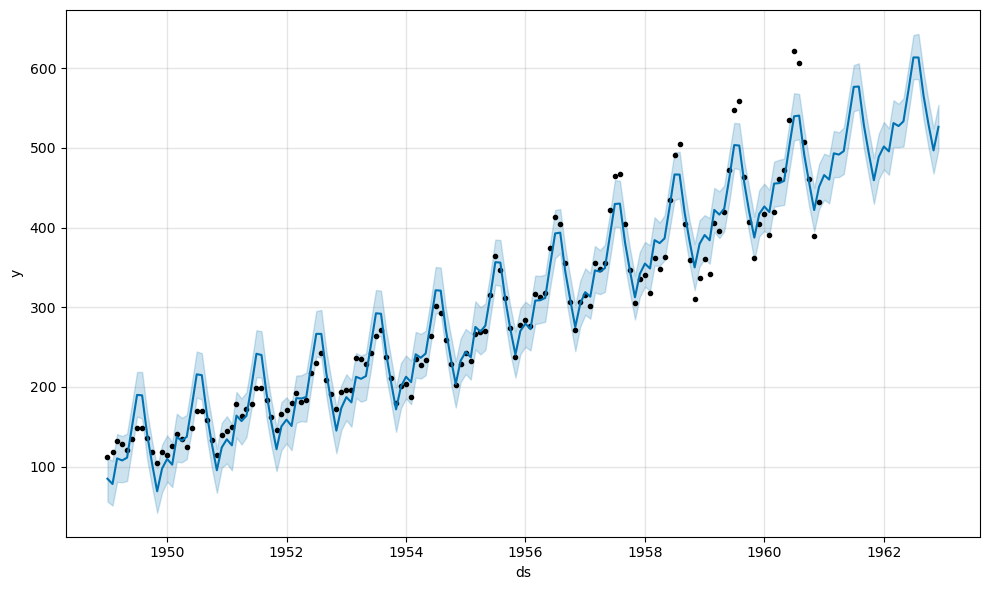

In [12]:
# plotting actuals and forecast
fig1 = m1.plot(forecast)

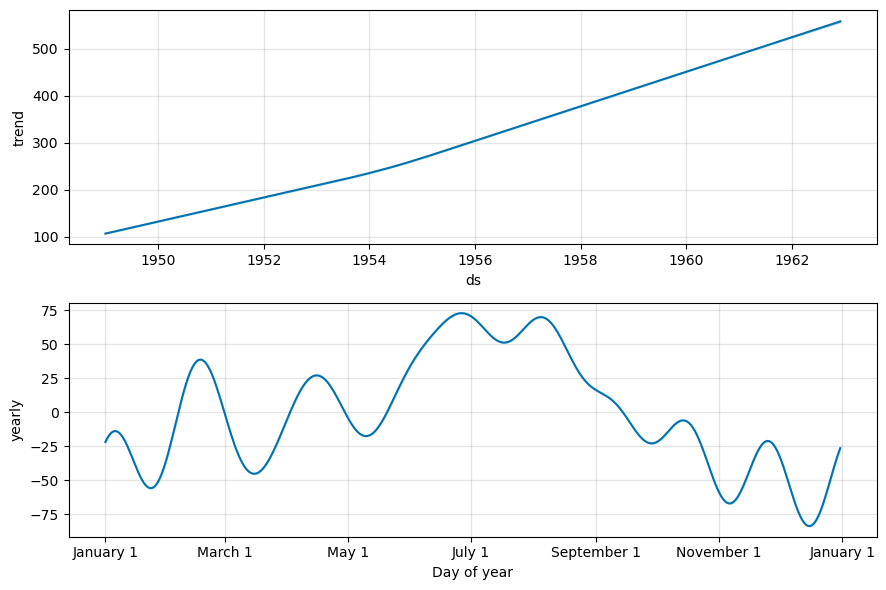

In [13]:
fig = m1.plot_components(forecast)

### Changepoints 

Prophet will automatically detect these changepoints and will allow the trend to adapt appropriately. However, if you wish to have finer control over this process (e.g., Prophet missed a rate change, or is overfitting rate changes in the history), then there are several input arguments you can use.

* Prior $\delta$ ~ LaPlace(0, $\tau$)
* Parameter Description: *changepoint_prior_scale*: $\tau$ controls the flexibility of the trend at changepoints. It is the scale parameter for the prior distribution of the rate at which the trend changes.
* Numerical Example: If you're forecasting sales around multiple new product launches, an increase in $\tau$ makes the model more responsive to these events. For example, setting $\tau=0.1$  rather than a more conservative value like 0.05 allows the model to detect and adapt to changes more aggressively.

By default 25 equally spaced changepoints are inferred for the first 80% of the time series in order to have plenty of runway for projecting the trend forward and to avoid overfitting fluctuations at the end of the time series. This default works in many situations but not all, and can be changed using the *changepoint_range* argument.

09:02:15 - cmdstanpy - INFO - Chain [1] start processing
09:02:15 - cmdstanpy - INFO - Chain [1] done processing


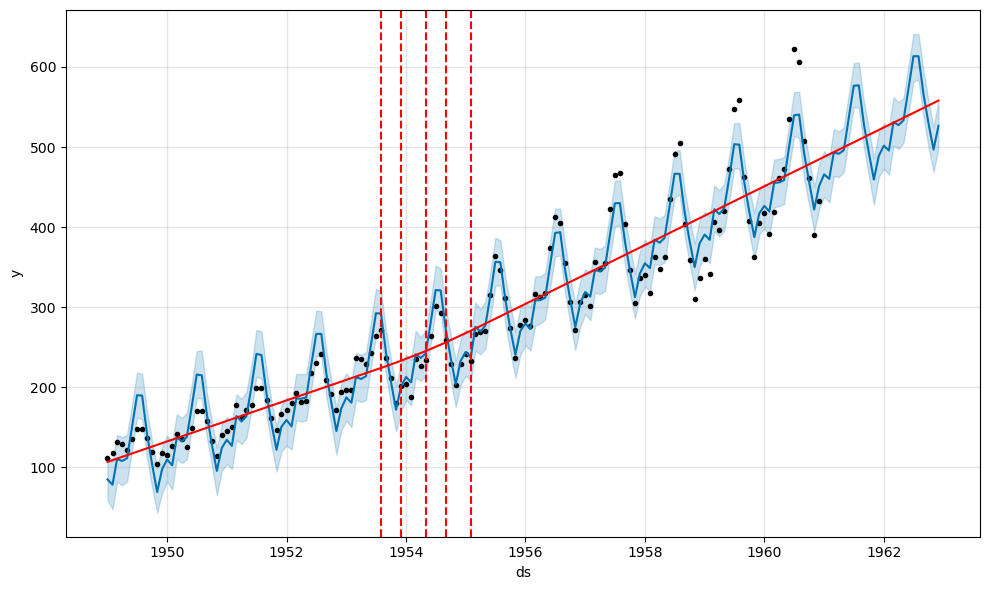

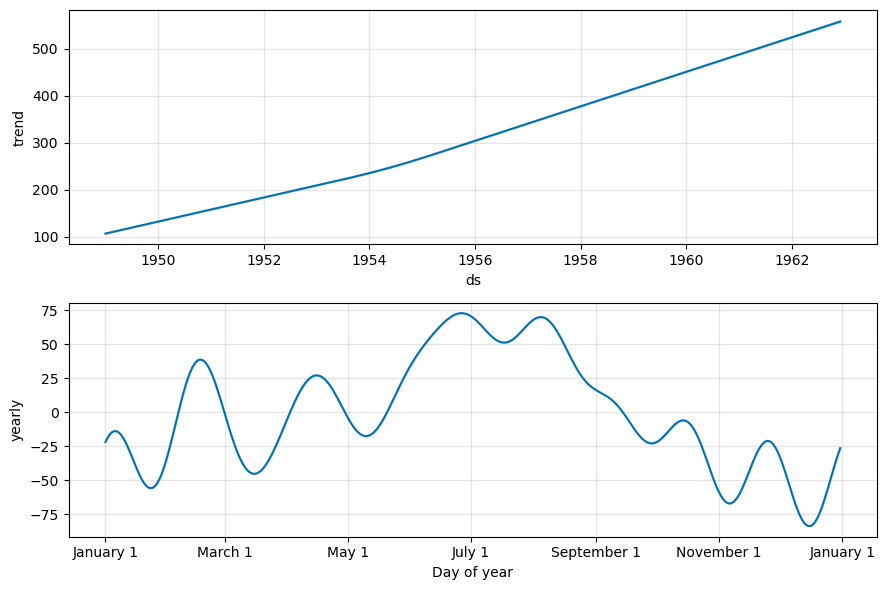

In [21]:
# adding changepoints to the plot
m2 = Prophet(changepoint_prior_scale=0.05, changepoint_range=0.8) # Default values are 0.05 and 0.8 respectively. Try scale = 0.001 and 100
forecast = m2.fit(df).predict(future)
fig = m2.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m2, forecast)

fig = m2.plot_components(forecast)


If you wish, rather than using automatic changepoint detection you can manually specify the locations of potential changepoints with the [changepoints](https://facebook.github.io/prophet/docs/trend_changepoints.html#specifying-the-locations-of-the-changepoints) argument!


### Seasonality 

Seasonalities are estimated using a partial Fourier sum. See the paper for complete details, and this [figure on Wikipedia ](https://en.wikipedia.org/wiki/Fourier_series#/media/File:Fourier_Series.svg)for an illustration of how a partial Fourier sum can approximate an arbitrary periodic signal. The number of terms in the partial sum (the order) is a parameter that determines how quickly the seasonality can change. 

* Smoothing Prior on seasonality $\beta$ ~ N(0, $\sigma^2$)
* Parameter Description: *seasonality_prior_scale* $\sigma$ affects how strongly the model fits the seasonal pattern of the data. It is used as the scale of the prior distribution for seasonal effects.
* Numerical Example: For a business with highly seasonal sales, such as a holiday store, emphasizing seasonal effects may be beneficial. Increasing $\sigma$ to a higher value, such as 15, can accentuate the seasonal components, capturing more pronounced seasonal fluctuations.

There are many other ways you can customize seasonalities. Check out the documentation [here](https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html). 

11:18:53 - cmdstanpy - INFO - Chain [1] start processing
11:18:53 - cmdstanpy - INFO - Chain [1] done processing


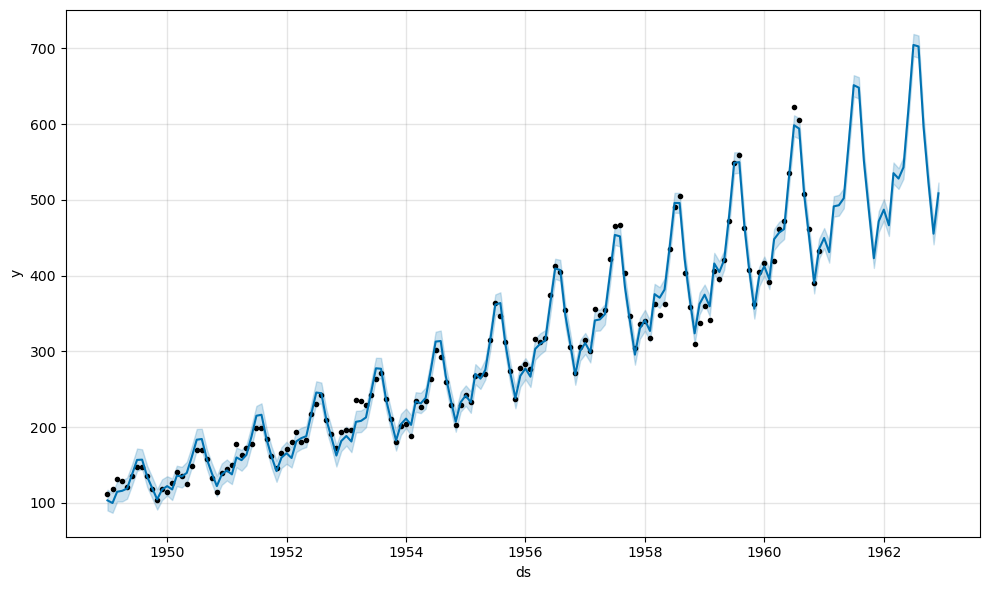

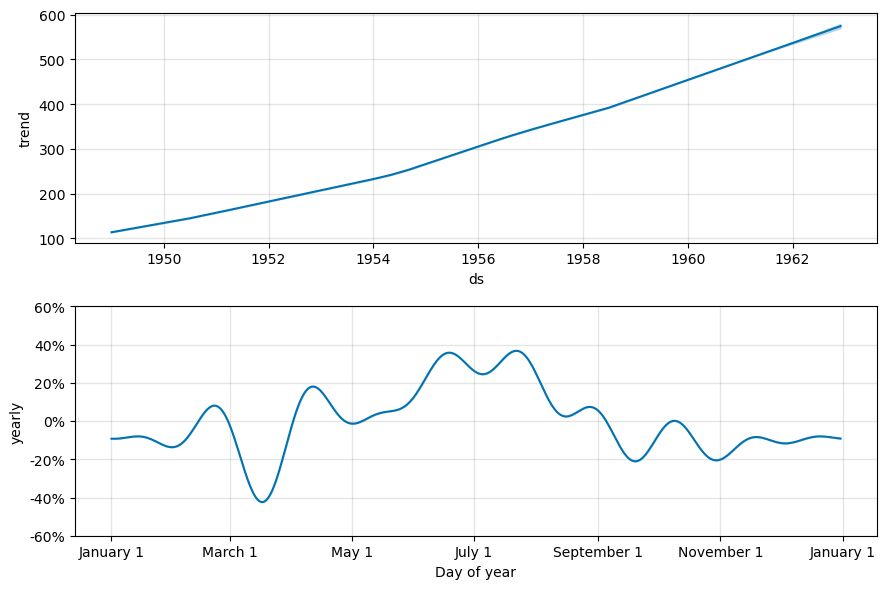

In [25]:
# adding seasonality priors 
m3 = Prophet(seasonality_mode='multiplicative', seasonality_prior_scale=10) # Default values are 'additive' and 10 respectively. Try 0.001
forecast = m3.fit(df).predict(future)
fig = m3.plot(forecast)

fig = m3.plot_components(forecast)


### Holidays 

If you have holidays or other recurring events that you’d like to model, you must create a dataframe for them. It has two columns (holiday and ds) and a row for each occurrence of the holiday. It must include all occurrences of the holiday, both in the past (back as far as the historical data go) and in the future (out as far as the forecast is being made). If they won’t repeat in the future, Prophet will model them and then not include them in the forecast.

You can also include columns lower_window and upper_window which extend the holiday out to [lower_window, upper_window] days around the date. For instance, if you wanted to include Christmas Eve in addition to Christmas you’d include lower_window=-1,upper_window=0. If you wanted to use Black Friday in addition to Thanksgiving, you’d include lower_window=0,upper_window=1. You can also include a column prior_scale to set the prior scale separately for each holiday. 


* Prior $\kappa$ ~ N(0, $\gamma^2$)
* Parameter Description: $\gamma$ impacts how significantly holidays affect the forecast. It determines the flexibility of the model in adjusting for holiday effects.


There are many other ways you can customize Holidays. Check out the documentation [here](https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html). 

12:03:57 - cmdstanpy - INFO - Chain [1] start processing
12:03:57 - cmdstanpy - INFO - Chain [1] done processing


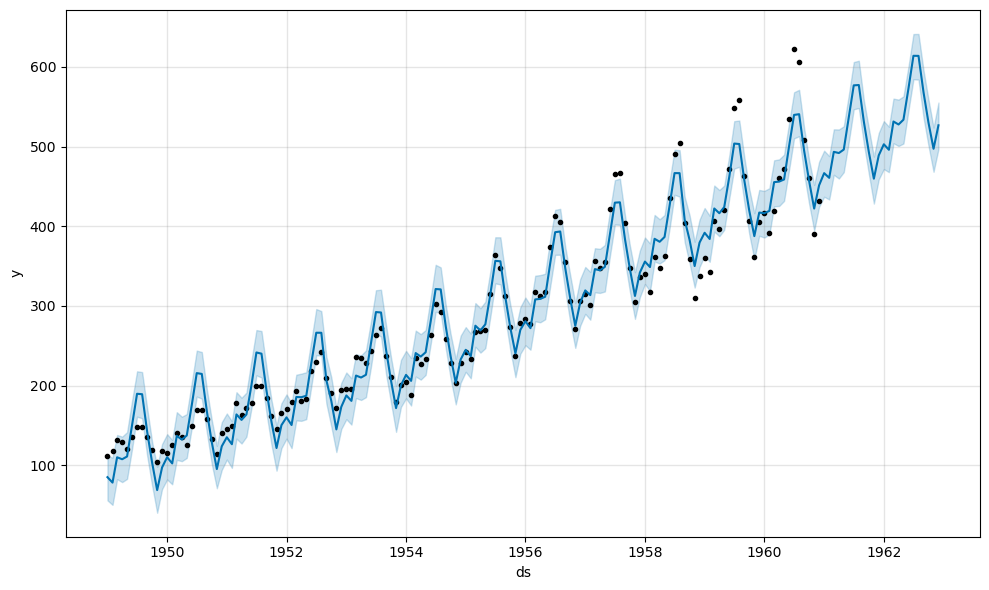

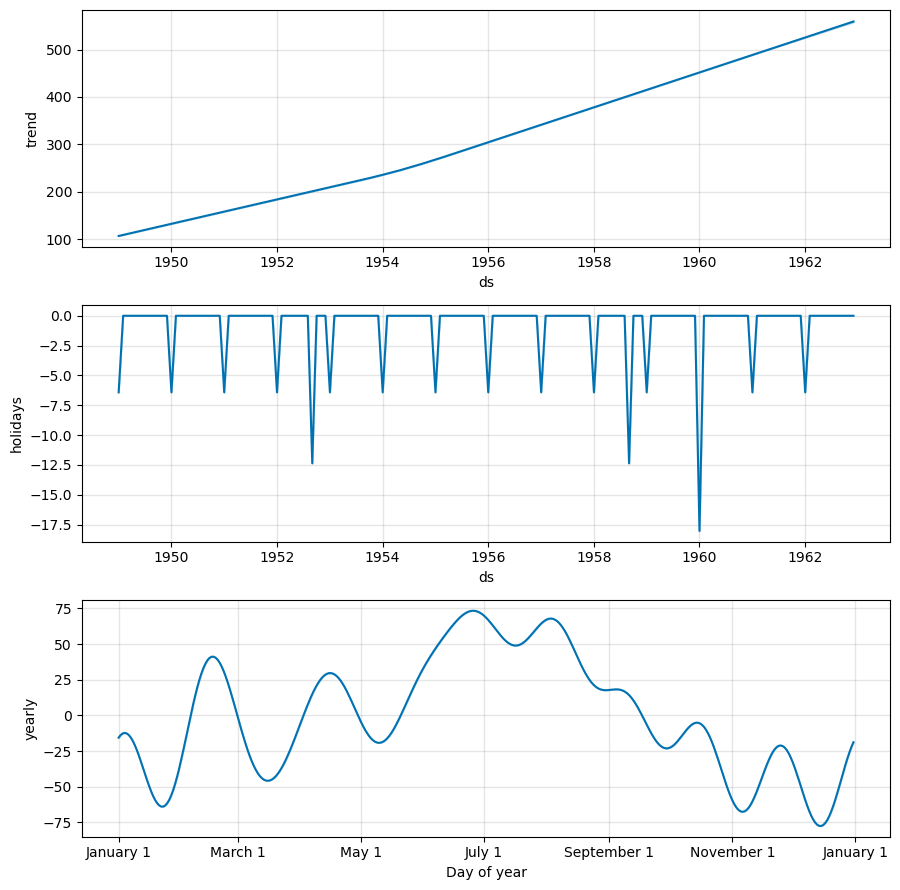

In [26]:
# adding US holidays 

my_custom_holiday = pd.DataFrame({
    'holiday': 'my_special_holiday',
    'ds': pd.to_datetime(['1960-01-01', '1960-01-02']),
    'lower_window': 0,
    'upper_window': 1,
})


m4 = Prophet(holidays=my_custom_holiday  , holidays_prior_scale=10) # Default value is 10, which provides very little regularization. Reducing this parameter dampens holiday effects
m4.add_country_holidays(country_name='US')
forecast = m4.fit(df).predict(future)
fig = m4.plot(forecast)

fig = m4.plot_components(forecast)

In [27]:
m4.train_holiday_names

0              my_special_holiday
1                  New Year's Day
2                Independence Day
3                       Labor Day
4                   Armistice Day
5                Thanksgiving Day
6                   Christmas Day
7                    Memorial Day
8           Washington's Birthday
9                    Columbus Day
10    Independence Day (observed)
11      New Year's Day (observed)
12                   Veterans Day
13       Christmas Day (observed)
14        Veterans Day (observed)
15       Armistice Day (observed)
dtype: object

Be careful, our data is monthly and you shouldn't read to much into the other holidays accept the new year YYY-01-01! 

## Model Evaluations & Diagnostics

Prophet includes functionality for time series cross validation to measure forecast error using historical data. This is done by selecting cutoff points in the history, and for each of them fitting the model using data only up to that cutoff point. We can then compare the forecasted values to the actual values.

This cross validation procedure can be done automatically for a range of historical cutoffs using the cross_validation function. We specify the forecast horizon (horizon), and then optionally the size of the initial training period (initial) and the spacing between cutoff dates (period). 
* By default, the initial training period is set to three times the horizon, and cutoffs are made every half a horizon.


12:04:16 - cmdstanpy - INFO - Chain [1] start processing
12:04:16 - cmdstanpy - INFO - Chain [1] done processing


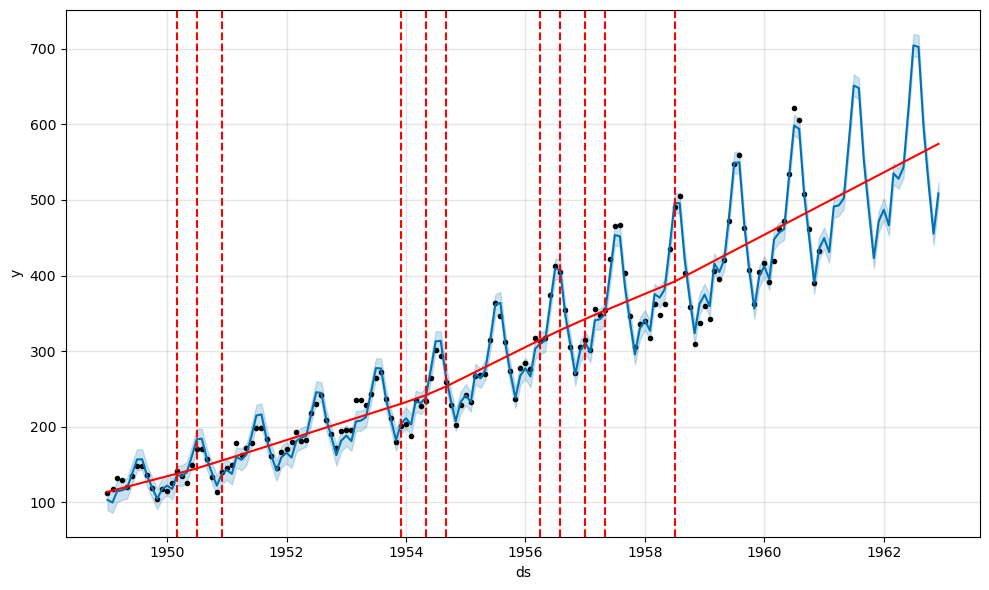

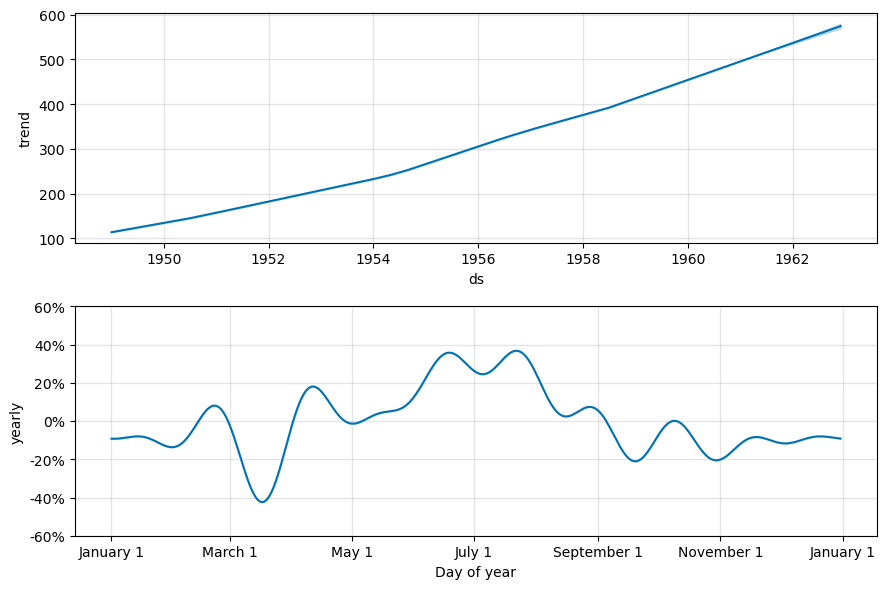

In [28]:
# Let's create a basic model 
m5 = Prophet(changepoint_prior_scale=0.05, changepoint_range=0.8, seasonality_mode='multiplicative', seasonality_prior_scale=10)
forecast = m5.fit(df).predict(future)
fig = m5.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m5, forecast)

fig = m5.plot_components(forecast)

In [29]:
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric


In the Prophet library for Python, when performing cross-validation, the initial, period, and horizon parameters are expected to be strings that represent a duration and these durations should be specified in days rather than months because not all months have the same number of days.

In [30]:
# Initial 5 years training period
initial = 5 * 365
initial = str(initial) + ' days'

# Rolling every 1 year
period = 1 * 365
period = str(period) + ' days'

# Forecast horizon 2 years into the future
horizon = 2* 365
horizon = str(horizon) + ' days'

print("initial: ", initial)
print("period: ", period)
print("horizon: ", horizon)

initial:  1825 days
period:  365 days
horizon:  730 days


In [31]:
df_cv = cross_validation(m5, initial=initial, period=period, horizon=horizon)

  0%|          | 0/5 [00:00<?, ?it/s]12:04:37 - cmdstanpy - INFO - Chain [1] start processing
12:04:37 - cmdstanpy - INFO - Chain [1] done processing
 20%|██        | 1/5 [00:00<00:00,  4.17it/s]12:04:37 - cmdstanpy - INFO - Chain [1] start processing
12:04:38 - cmdstanpy - INFO - Chain [1] done processing
 40%|████      | 2/5 [00:00<00:00,  3.87it/s]12:04:38 - cmdstanpy - INFO - Chain [1] start processing
12:04:38 - cmdstanpy - INFO - Chain [1] done processing
 60%|██████    | 3/5 [00:00<00:00,  2.89it/s]12:04:38 - cmdstanpy - INFO - Chain [1] start processing
12:04:38 - cmdstanpy - INFO - Chain [1] done processing
12:04:38 - cmdstanpy - INFO - Chain [1] start processing
12:04:38 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 5/5 [00:01<00:00,  4.21it/s]


In [32]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1955-01-01,228.620933,221.214703,237.034483,242,1954-12-03
1,1955-02-01,231.439102,223.587458,239.486369,233,1954-12-03
2,1955-03-01,267.034527,258.905587,275.107375,267,1954-12-03
3,1955-04-01,253.063045,244.699516,260.542070,269,1954-12-03
4,1955-05-01,259.927177,252.044889,268.013998,270,1954-12-03
...,...,...,...,...,...,...
115,1960-08-01,554.464837,540.360460,568.088185,606,1958-12-02
116,1960-09-01,477.505672,464.414805,490.576169,508,1958-12-02
117,1960-10-01,415.922738,402.701380,428.073372,461,1958-12-02
118,1960-11-01,367.066504,354.540809,379.934778,390,1958-12-02


In [33]:
metrics = performance_metrics(df_cv)
metrics

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,89 days,384.191629,19.600807,14.744496,0.044482,0.041884,0.042880,0.388889
1,119 days,390.571882,19.762892,15.039865,0.046368,0.041884,0.044979,0.361111
2,120 days,555.906689,23.577674,17.386393,0.052118,0.041884,0.050141,0.250000
3,149 days,515.460832,22.703762,16.288684,0.049145,0.038997,0.047459,0.250000
4,150 days,518.424863,22.768945,16.529889,0.048416,0.037680,0.046909,0.291667
5,180 days,579.225055,24.067095,18.037097,0.053715,0.037680,0.052996,0.270833
6,181 days,467.119812,21.612955,16.664143,0.046374,0.030305,0.046101,0.375000
7,210 days,565.758097,23.785670,18.779600,0.051946,0.036438,0.052530,0.354167
8,211 days,583.998476,24.166060,20.522658,0.051765,0.036438,0.052904,0.333333
9,241 days,657.770272,25.647032,22.263098,0.057042,0.044669,0.058782,0.291667


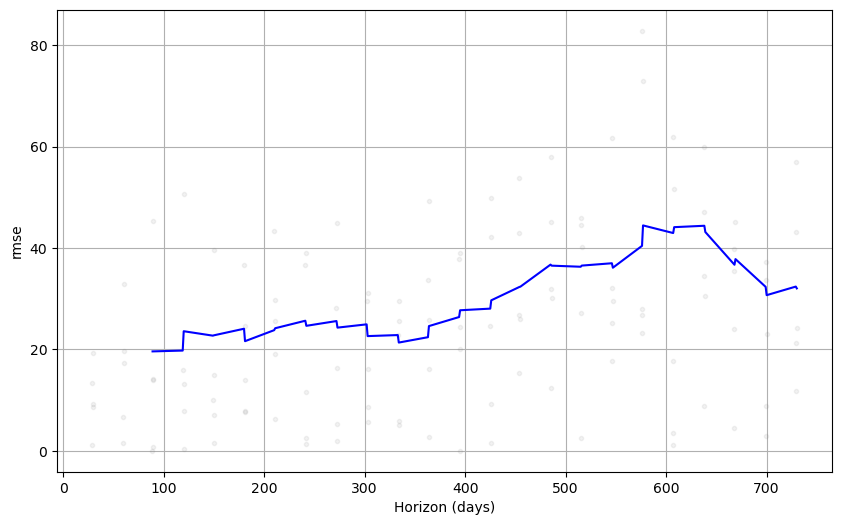

In [34]:
plot_cross_validation_metric(df_cv, metric='rmse');


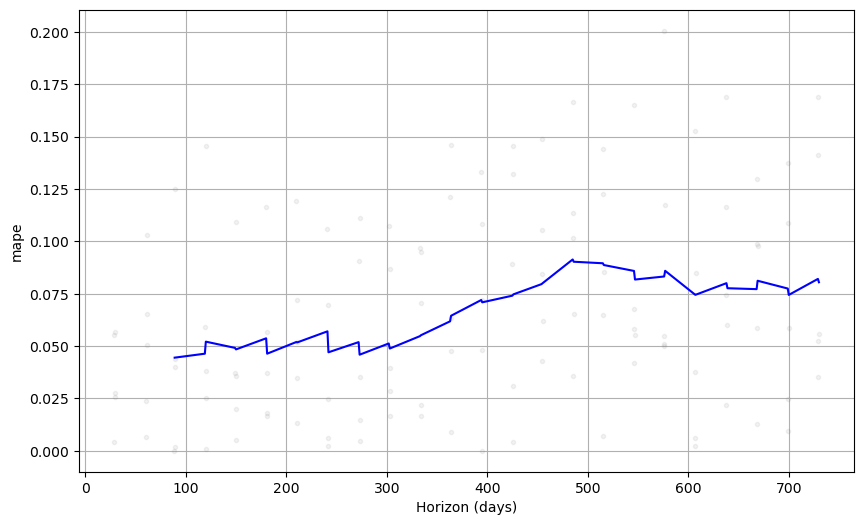

In [35]:
plot_cross_validation_metric(df_cv, metric='mape');
